In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

In [2]:
train_df = pd.read_csv ("churn_train.csv")
test_df = pd.read_csv ("churn_test.csv")

**Analys av datan**

In [3]:
train_df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1768-ZAIFU,Female,1,No,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,25.20,25.2,Yes
1,2159-TURXX,Male,0,No,No,5,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),20.05,95.55,No
2,8261-GWDBQ,Female,1,Yes,No,60,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),116.05,6925.9,No
3,2732-ISEZX,Female,0,No,No,5,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.50,104.3,No
4,7607-QKKTJ,Male,0,Yes,Yes,45,Yes,Yes,Fiber optic,No,...,Yes,No,No,Yes,One year,Yes,Credit card (automatic),95.00,4368.85,No
5,7493-GVFIO,Male,0,No,No,57,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),20.55,1252.85,No
6,8436-BJUMM,Male,0,Yes,Yes,26,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,83.75,2070.6,Yes
7,8908-NMQTX,Male,0,No,No,72,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),65.60,4566.5,No
8,7938-OUHIO,Male,0,No,No,3,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,98.70,293.65,Yes
9,0913-XWSCN,Male,0,Yes,Yes,55,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,No,Bank transfer (automatic),85.50,4713.4,No


In [4]:
test_df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,9505-SQFSW,Female,0,Yes,Yes,3,No,No phone service,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,40.30,92.5,No
1,1723-HKXJQ,Male,0,No,No,42,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,101.75,4273.45,Yes
2,9154-QDGTH,Male,0,Yes,Yes,43,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic),104.30,4451.85,No
3,8309-IEYJD,Female,1,No,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.60,70.6,No
4,8775-CEBBJ,Female,0,No,No,9,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes
5,6463-HHXJR,Female,0,Yes,Yes,71,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Two year,No,Bank transfer (automatic),100.50,7030.65,No
6,9372-TXXPS,Female,0,Yes,No,60,Yes,No,DSL,Yes,...,No,Yes,No,No,Two year,No,Bank transfer (automatic),59.85,3483.45,No
7,7112-OPOTK,Male,0,No,No,33,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Electronic check,68.25,2171.15,Yes
8,2876-VBBBL,Female,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.25,20.25,Yes
9,1135-LMECX,Female,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.85,19.85,No


In [5]:
train_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
test_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
train_df.shape

(5634, 21)

In [8]:
test_df.shape

(1409, 21)

In [9]:
train_df.nunique()

customerID          5634
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1499
TotalCharges        5290
Churn                  2
dtype: int64

In [10]:
test_df.nunique()

customerID          1409
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges       809
TotalCharges        1373
Churn                  2
dtype: int64

Här  ser vi att test datan är mycket mindre än träningsdatan. 

In [11]:
attribute_counts = train_df['Churn'].value_counts()
print (attribute_counts)

No     4148
Yes    1486
Name: Churn, dtype: int64


In [12]:
attribute_counts = test_df['Churn'].value_counts()
print (attribute_counts)

No     1026
Yes     383
Name: Churn, dtype: int64


Här ser vi datan på hur många det är som har eller inte lämnar Telco. 

In [13]:
null_values =  train_df.isnull()
null_true = null_values.sum().sum()
null_false = null_values.size - null_true
list_of_null = f"{null_true} True and {null_false} False"
print (list_of_null)

0 True and 118314 False


In [14]:
null_values =  test_df.isnull()
null_true = null_values.sum().sum()
null_false = null_values.size - null_true
list_of_null = f"{null_true} True and {null_false} False"
print (list_of_null)

0 True and 29589 False


In [15]:
dupe= train_df.duplicated()
dupe_true = dupe.sum().sum()
dupe_false = dupe.size - dupe_true
list_of_dupe = f"{dupe_true} Dupes and {dupe_false} Non Dupes"
print (list_of_dupe)

0 Dupes and 5634 Non Dupes


In [16]:
dupe= test_df.duplicated()
dupe_true = dupe.sum().sum()
dupe_false = dupe.size - dupe_true
list_of_dupe = f"{dupe_true} Dupes and {dupe_false} Non Dupes"
print (list_of_dupe)

0 Dupes and 1409 Non Dupes


Varken tränings eller test datan har nullvärden eller dupes. 

array([[<Axes: title={'center': 'SeniorCitizen'}>,
        <Axes: title={'center': 'tenure'}>],
       [<Axes: title={'center': 'MonthlyCharges'}>, <Axes: >]],
      dtype=object)

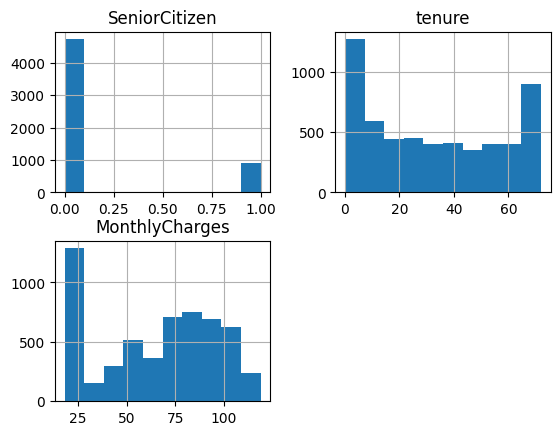

In [17]:
train_df.hist()

<Axes: >

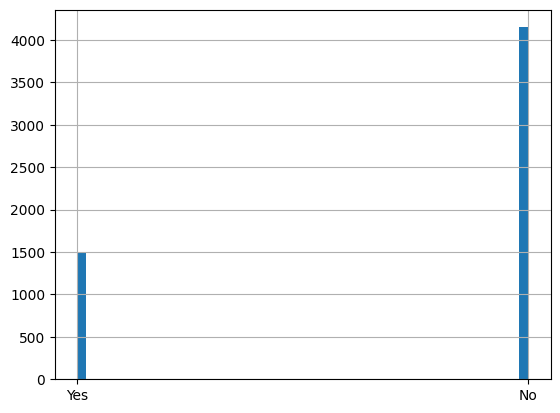

In [18]:
train_df["Churn"].hist (bins=50)

array([[<Axes: title={'center': 'SeniorCitizen'}>,
        <Axes: title={'center': 'tenure'}>],
       [<Axes: title={'center': 'MonthlyCharges'}>, <Axes: >]],
      dtype=object)

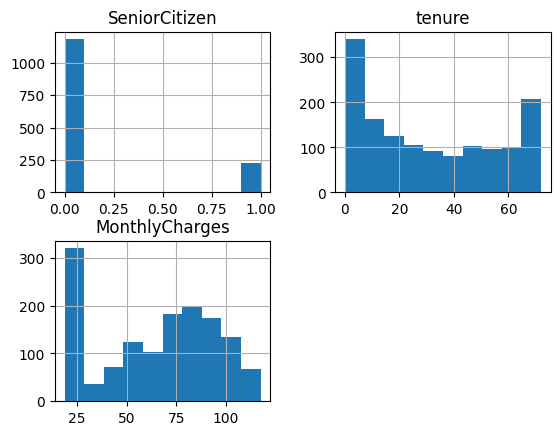

In [19]:
test_df.hist()

<Axes: >

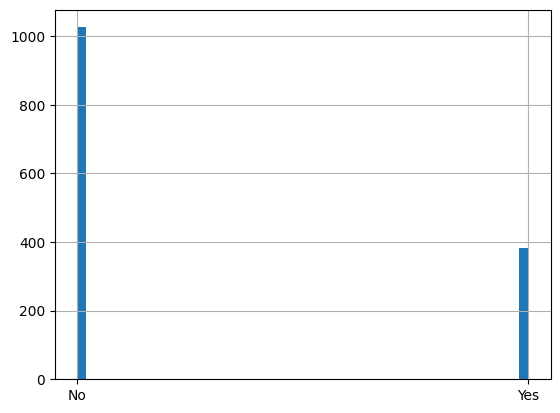

In [20]:
test_df["Churn"].hist (bins=50)

*Hur ser fördeling av target datan ut?*
På både train och test, finns det mycket fler nej än vad det finns ja (train har 4148/1486 och test har 1026/383).
*är det jämt fördelat?* Nej, det är inte det.
*Kan det ställa till med problem?*
Ja, det kan ställa till problem. eftersom det inte är jämnt, kan vi få problem med overfittning. 

**Förbredd datan för att kunna användas av modellen**

*Finns det data som inte borde användas? Varför i sådan fall?*

CustomerID behövs inte använda. Varje customerID är helt olika varanda. 

In [21]:
train_df['customerID']

0       1768-ZAIFU
1       2159-TURXX
2       8261-GWDBQ
3       2732-ISEZX
4       7607-QKKTJ
           ...    
5629    9880-TDQAC
5630    9030-QGZNL
5631    2796-NNUFI
5632    3521-SYVOR
5633    5453-AXEPF
Name: customerID, Length: 5634, dtype: object

In [22]:
train_df.drop('customerID', axis=1, inplace=True)

In [23]:
test_df.drop('customerID', axis=1, inplace=True)

*det finns en hel del textdata som måste behandlas på något vis (Finns flera olika alterantiv)*

In [24]:
def encode_columns(train_df):
    columns = train_df.columns
    for c in columns:
        le = LabelEncoder()
        le.fit(train_df[c])
        train_df[c] = le.transform(train_df[c])
    return train_df

def encode_columns(test_df):
    columns = test_df.columns
    for c in columns:
        le = LabelEncoder()
        le.fit(test_df[c])
        test_df[c] = le.transform(test_df[c])
    return test_df

In [25]:
encode_train_df = encode_columns(train_df)

In [26]:
encode_test_df = encode_columns(test_df)

In [27]:
encode_train_df.dtypes

gender              int32
SeniorCitizen       int64
Partner             int32
Dependents          int32
tenure              int64
PhoneService        int32
MultipleLines       int32
InternetService     int32
OnlineSecurity      int32
OnlineBackup        int32
DeviceProtection    int32
TechSupport         int32
StreamingTV         int32
StreamingMovies     int32
Contract            int32
PaperlessBilling    int32
PaymentMethod       int32
MonthlyCharges      int64
TotalCharges        int32
Churn               int32
dtype: object

In [28]:
encode_test_df.dtypes

gender              int32
SeniorCitizen       int64
Partner             int32
Dependents          int32
tenure              int64
PhoneService        int32
MultipleLines       int32
InternetService     int32
OnlineSecurity      int32
OnlineBackup        int32
DeviceProtection    int32
TechSupport         int32
StreamingTV         int32
StreamingMovies     int32
Contract            int32
PaperlessBilling    int32
PaymentMethod       int32
MonthlyCharges      int64
TotalCharges        int32
Churn               int32
dtype: object

In [29]:
encode_train_df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,2,93,1736,1
1,1,0,0,0,5,1,0,2,1,1,1,1,1,1,0,0,1,29,5213,0
2,0,1,1,0,60,1,2,1,2,2,2,2,2,2,2,1,0,1477,4416,0
3,0,0,0,0,5,1,0,2,1,1,1,1,1,1,0,1,3,38,67,0
4,1,0,1,1,45,1,2,1,0,2,2,0,0,2,1,1,1,1125,3002,0
5,1,0,0,0,57,1,0,2,1,1,1,1,1,1,2,0,1,39,362,0
6,1,0,1,1,26,1,2,1,0,0,0,0,2,0,0,1,2,912,1365,1
7,1,0,0,0,72,0,1,0,2,2,2,2,2,2,2,1,0,596,3144,0
8,1,0,0,0,3,1,0,1,0,0,2,2,2,2,0,1,2,1191,2046,1
9,1,0,1,1,55,1,2,1,0,0,0,0,0,2,0,0,0,947,3230,0


In [30]:
encode_test_df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,1,3,0,1,0,0,2,0,0,0,2,0,0,3,131,1347,0
1,1,0,0,0,42,1,2,1,0,2,0,0,2,2,0,1,2,696,761,1
2,1,0,1,1,43,1,2,1,0,0,2,2,2,2,1,1,1,718,794,0
3,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,1,3,366,1160,0
4,0,0,0,0,9,1,0,0,0,0,0,0,0,0,0,1,0,143,722,1
5,0,0,1,1,71,1,2,1,2,2,2,0,2,0,2,0,0,682,1163,0
6,0,0,1,0,60,1,0,0,2,2,0,2,0,0,2,0,0,269,631,0
7,1,0,0,0,33,1,0,1,0,0,0,0,0,0,0,0,2,330,386,1
8,0,0,0,0,1,1,0,2,1,1,1,1,1,1,0,1,3,28,354,1
9,0,0,0,0,1,1,0,2,1,1,1,1,1,1,0,0,3,20,329,0


Jag har använt mig av enconder här. 

**Träna en XGBoost modell**

In [31]:
X_train = encode_train_df.drop(columns=['Churn'])
X_test = encode_test_df.drop(columns=['Churn'])
y_test = encode_test_df['Churn']
y_train = encode_train_df['Churn']

In [32]:
model = xgb.XGBClassifier()

In [33]:
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

**Utvärdera modellen**

*beräkna accuracy*

In [34]:
model.score(X_train,y_train)

0.9483493077742279

In [35]:
predictions = model.predict(X_train)

In [36]:
accuracy_score (y_train,predictions)

0.9483493077742279

In [37]:
model.score(X_test,y_test)

0.7693399574166075

Vi ser här att träning och test scoret är väldigt olika varanda. Tränningen är för stor med 18%.

In [38]:
predictions = model.predict(X_test)

In [39]:
accuracy_score (y_test, predictions)

0.7693399574166075

score blir likandant vi också köra kör med predictions. 

In [40]:
print("Mean Cross Validation Score: ",cross_val_score(model,X_train,y_train, cv=10).mean())

Mean Cross Validation Score:  0.7862946096771349


In [41]:
print("Mean Cross Validation Score: ",cross_val_score(model,X_test,y_test, cv=10).mean())

Mean Cross Validation Score:  0.7615248226950355


Om vi använder oss av Mean Cross Validation, då blir det en mindre skilland mellan train och test (78 respektivet 76)

*Analysera vilka attribut som har störst påverkan*

In [42]:
print (model.feature_names_in_)
print (model.feature_importances_)

['gender' 'SeniorCitizen' 'Partner' 'Dependents' 'tenure' 'PhoneService'
 'MultipleLines' 'InternetService' 'OnlineSecurity' 'OnlineBackup'
 'DeviceProtection' 'TechSupport' 'StreamingTV' 'StreamingMovies'
 'Contract' 'PaperlessBilling' 'PaymentMethod' 'MonthlyCharges'
 'TotalCharges']
[0.01536674 0.02185874 0.01842442 0.01907849 0.03411133 0.0202714
 0.02220327 0.1040456  0.07007151 0.02311426 0.02264106 0.05565396
 0.01830821 0.02579102 0.43852833 0.02531424 0.02109264 0.02316736
 0.02095749]


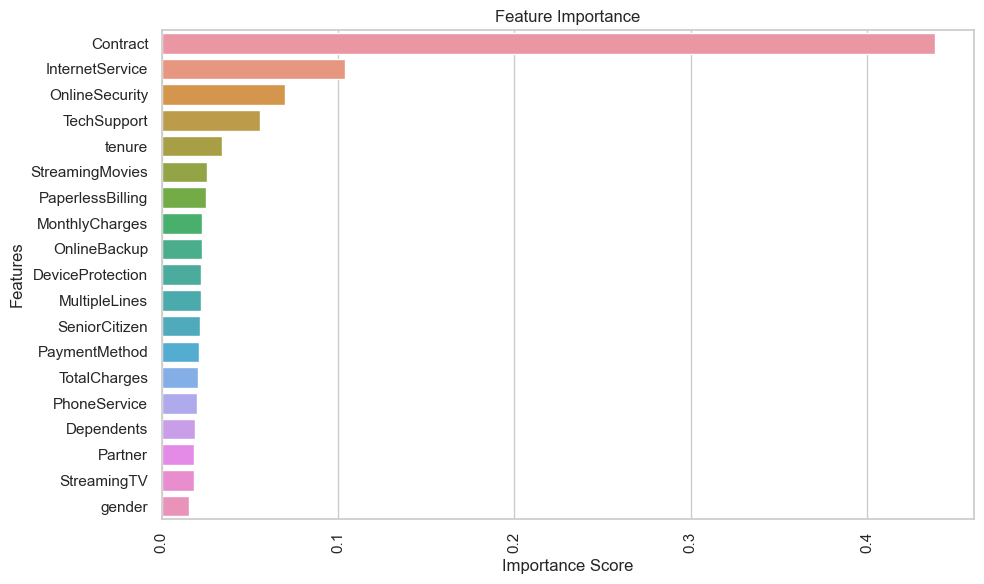

In [43]:
importance = model.feature_importances_
feature_names = X_train.columns
sorted_idx = np.argsort(importance)[::-1]

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=importance[sorted_idx], y=[feature_names[idx] for idx in sorted_idx])
plt.xticks(rotation='vertical')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

Här ser vi att Contract har störst påverkan här. 

*Rita ut en confusion matrix och analysera hur modellen gör prediktioner och
vilka typer av fel den gör.*

In [44]:
y_pred = model.predict(X_test)

In [45]:
Con = confusion_matrix(y_test,y_pred)
print (Con)

[[977  49]
 [276 107]]


<Axes: >

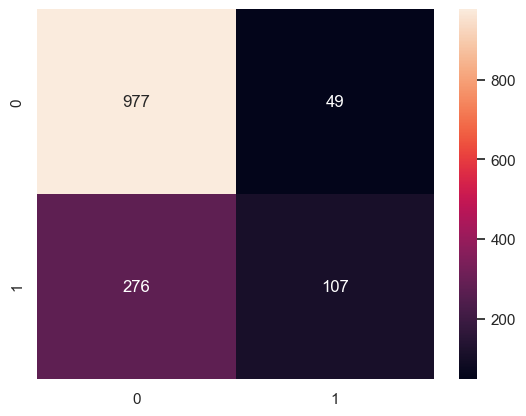

In [46]:
sns.heatmap(Con, annot=True, fmt='d')

In [47]:
report = classification_report (y_test,y_pred)

In [48]:
print("\nClassification Report:")
print (report)


Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.95      0.86      1026
           1       0.69      0.28      0.40       383

    accuracy                           0.77      1409
   macro avg       0.73      0.62      0.63      1409
weighted avg       0.75      0.77      0.73      1409



Vi kan se här på f1 score att för 0 (vilket är No för Churn) blir det 86%, precision blir 78% och recall blir 95%. Däremot för 1 (yes på churn) blir det 69% på precision, 28% på recall och på f1 score blir det 40%. problemet här är att det finns mycket fler 0 data i jämförelse med 1 datan. 

In [49]:
(49+276)/(9077+107+49+276) 

0.03417814701861394

In [ ]:
def encode_columns(train_df, test_df):
    columns = train_df.columns
    for c in columns:
        if c in columns.astype(object):
            le = LabelEncoder()
            le.fit(train_df[c])
            le.fit(test_df[c])
            train_df[c] = le.transform(train_df[c])
            test_df[c] = le.transform(test_df[c])
        train_df[c] = train_df[c].astype(int)
        test_df[c] = test_df[c].astype(int)
    return train_df, test_df